In [27]:
import napari

viewer = napari.Viewer()

In [28]:
import numpy as np
import cv2

# Dimensions
X, Y = 512, 512       # width and height of each image
Z = 50                 # number of z-slices
C = 3                 # number of channels (e.g., RGB)
T = 4                 # number of time points

def create_image_stack(X, Y, Z, C, T):  
    """Create a 5D image stack with dimensions (C, T, Z, Y, X).

    Parameters:

    X (int): Width of each image.
    Y (int): Height of each image.
    Z (int): Number of z-slices.
    C (int): Number of channels (e.g., RGB).
    T (int): Number of time points.
    Returns:
    np.ndarray: A 5D numpy array with shape (C, T, Z, Y, X) initialized to zeros.
    """
    # Create empty array (Z, T, Y, X, C)
    # We'll arrange axes as Z, T, Y, X, C for convenience here
    image_stack = np.zeros((C, T, Z, Y, X), dtype=np.uint8)

    # Font settings for OpenCV text
    font = cv2.FONT_HERSHEY_PLAIN
    font_scale = 1.5
    color = (255, 255, 255)  # white text
    thickness = 1
    position = (10, Y//2)    # position text near left-center

    for z in range(Z):
        for c in range(C):
            for t in range(T):
                # Start with black image for this slice/frame
                img = np.zeros((Y, X), dtype=np.uint8)
                
                # Compose label string
                label = f"Z={z}, C={c}, T={t}"
                
                # Put text on the image (white text)
                cv2.putText(img, label, position, font, font_scale, color, thickness, cv2.LINE_AA)
                
                # Assign to stack
                image_stack[c, t, z, :, :] = img
    return image_stack


img1 = create_image_stack(X, Y, Z, C, T)
img2 = create_image_stack(X, Y, Z, 1, T)
# Now image_stack has shape (Z, T, Y, X, C)
print(f"img1 shape: {img1.shape}")
print(f"img2 shape: {img2.shape}")


img1 shape: (3, 4, 50, 512, 512)
img2 shape: (1, 4, 50, 512, 512)


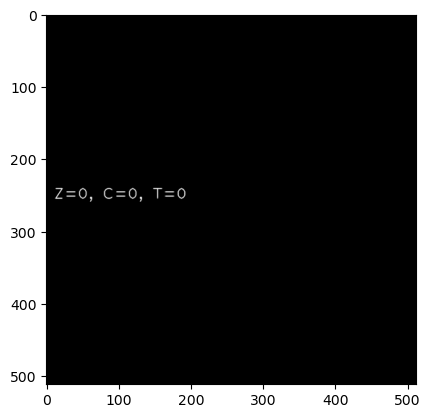

In [29]:
import matplotlib.pyplot as plt

img2 = img2.squeeze(axis=0)  # Remove the channel dimension for display

plt.imshow(img1[0, 0, 0, :, :], cmap='gray')

In [30]:
viewer.add_image(img1)
viewer.add_image(img2)

<Image layer 'img2' at 0x20afa61d450>